In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

df = pd.read_csv('predictions_creditcard.csv')

In [2]:
df.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status,Status_Detail
0,5008826,F,1,0,0,130500,Working ...,Incomplete higher ...,Married ...,House / apartment ...,...,0,0,Accountants ...,2,30,4,7,23,1,Issued
1,5008832,F,0,1,0,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,1,0,Laborers ...,2,28,5,2,33,1,Issued
2,5008841,M,0,1,1,405000,Commercial associate ...,Higher education ...,Married ...,House / apartment ...,...,0,0,Managers ...,3,33,6,0,5,1,Issued
3,5008858,F,1,1,2,135000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,Laborers ...,4,44,9,0,11,1,Issued
4,5008862,F,1,1,2,135000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,Laborers ...,4,44,9,0,3,1,Issued


In [3]:
df.isnull().sum().sort_values(ascending = False)

Applicant_ID            0
Applicant_Gender        0
Status                  0
Total_Good_Debt         0
Total_Bad_Debt          0
Years_of_Working        0
Applicant_Age           0
Total_Family_Members    0
Job_Title               0
Owned_Email             0
Owned_Phone             0
Owned_Work_Phone        0
Owned_Mobile_Phone      0
Housing_Type            0
Family_Status           0
Education_Type          0
Income_Type             0
Total_Income            0
Total_Children          0
Owned_Realty            0
Owned_Car               0
Status_Detail           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          2513 non-null   int64 
 1   Applicant_Gender      2513 non-null   object
 2   Owned_Car             2513 non-null   int64 
 3   Owned_Realty          2513 non-null   int64 
 4   Total_Children        2513 non-null   int64 
 5   Total_Income          2513 non-null   int64 
 6   Income_Type           2513 non-null   object
 7   Education_Type        2513 non-null   object
 8   Family_Status         2513 non-null   object
 9   Housing_Type          2513 non-null   object
 10  Owned_Mobile_Phone    2513 non-null   int64 
 11  Owned_Work_Phone      2513 non-null   int64 
 12  Owned_Phone           2513 non-null   int64 
 13  Owned_Email           2513 non-null   int64 
 14  Job_Title             2513 non-null   object
 15  Total_Family_Members  2513 non-null   

In [5]:
df.describe()

,Applicant_ID,Owned_Car,Owned_Realty,Total_Children,Total_Income,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
count,2.513000e+03,2513.000000,2513.000000,2513.000000,2513.000000,2513.0,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000
mean,5.079426e+06,0.426980,0.651811,0.495822,194747.598090,1.0,0.271787,0.281735,0.101472,2.275766,40.623558,7.695981,0.322324,21.445285,0.997214
std,4.209420e+04,0.494738,0.476491,0.751380,100485.043488,0.0,0.444969,0.449934,0.302013,0.925982,9.817440,6.499808,1.364489,14.808097,0.052715
min,5.008826e+06,0.000000,0.000000,0.000000,36000.000000,1.0,0.000000,0.000000,0.000000,1.000000,21.000000,1.000000,0.000000,1.000000,0.000000
25%,5.042335e+06,0.000000,0.000000,0.000000,135000.000000,1.0,0.000000,0.000000,0.000000,2.000000,32.000000,3.000000,0.000000,9.000000,1.000000
50%,5.085687e+06,0.000000,1.000000,0.000000,180000.000000,1.0,0.000000,0.000000,0.000000,2.000000,40.000000,6.000000,0.000000,18.000000,1.000000
75%,5.115780e+06,1.000000,1.000000,1.000000,225000.000000,1.0,1.000000,1.000000,0.000000,3.000000,48.000000,10.000000,0.000000,31.000000,1.000000
max,5.150485e+06,1.000000,1.000000,5.000000,990000.000000,1.0,1.000000,1.000000,1.000000,7.000000,67.000000,40.000000,28.000000,61.000000,1.000000


In [6]:
df.shape

(2513, 22)

In [7]:
df.columns

Index(['Applicant_ID', 'Applicant_Gender', 'Owned_Car', 'Owned_Realty',
       'Total_Children', 'Total_Income', 'Income_Type', 'Education_Type',
       'Family_Status', 'Housing_Type', 'Owned_Mobile_Phone',
       'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email', 'Job_Title',
       'Total_Family_Members', 'Applicant_Age', 'Years_of_Working',
       'Total_Bad_Debt', 'Total_Good_Debt', 'Status', 'Status_Detail'],
      dtype='object')

<Axes: >

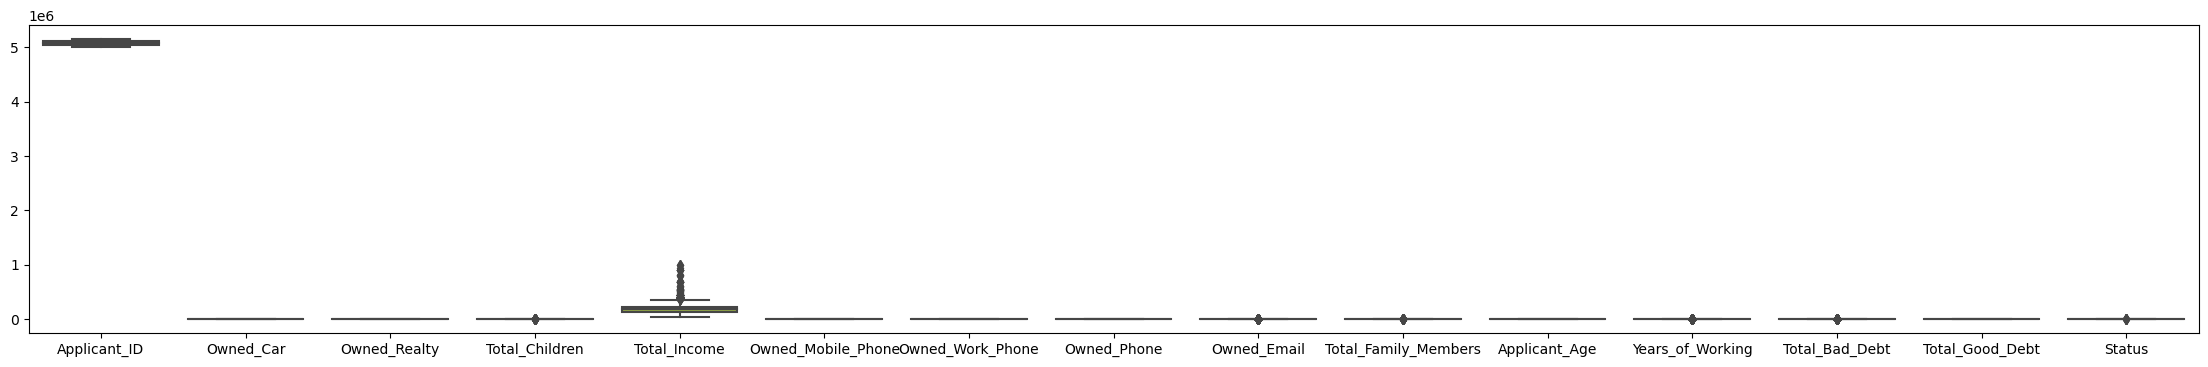

In [8]:
plt.figure(figsize = (28,4))
sns.boxplot(data = df)

In [9]:
df['Total_Debt'] = df['Total_Bad_Debt'] + df['Total_Good_Debt']

In [10]:
df.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status,Status_Detail,Total_Debt
0,5008826,F,1,0,0,130500,Working ...,Incomplete higher ...,Married ...,House / apartment ...,...,0,Accountants ...,2,30,4,7,23,1,Issued,30
1,5008832,F,0,1,0,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,Laborers ...,2,28,5,2,33,1,Issued,35
2,5008841,M,0,1,1,405000,Commercial associate ...,Higher education ...,Married ...,House / apartment ...,...,0,Managers ...,3,33,6,0,5,1,Issued,5
3,5008858,F,1,1,2,135000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,Laborers ...,4,44,9,0,11,1,Issued,11
4,5008862,F,1,1,2,135000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,Laborers ...,4,44,9,0,3,1,Issued,3


Applicant_Gender
F          1576
M           937
Name: count, dtype: int64


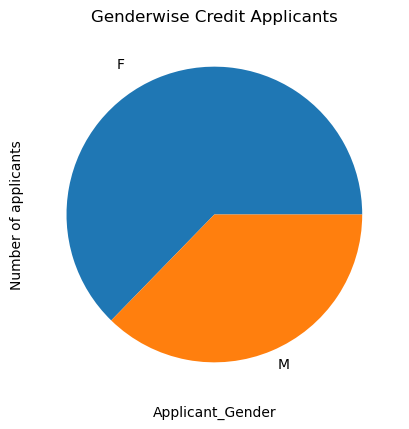

In [11]:
print(df['Applicant_Gender'].value_counts())
df['Applicant_Gender'].value_counts().plot(kind = 'pie')
plt.title('Genderwise Credit Applicants')
plt.xlabel('Applicant_Gender')
plt.ylabel('Number of applicants')
plt.xticks(rotation = 0)
plt.show()

C:\Users\Raj\AppData\Local\Temp\ipykernel_1672\3780938732.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df['Income_Type'], y = df['Total_Income'], hue = df['Applicant_Gender'], ci = None, width = 0.4)


<Axes: xlabel='Income_Type', ylabel='Total_Income'>

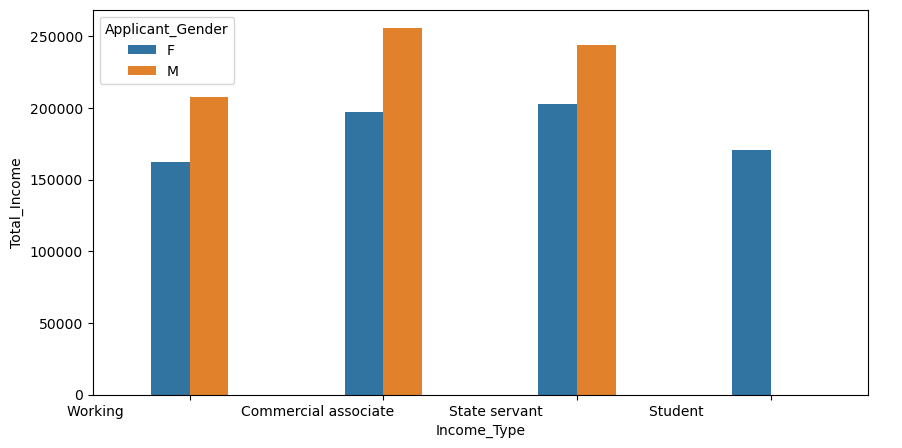

In [12]:
plt.figure(figsize = (10,5))
sns.barplot(x = df['Income_Type'], y = df['Total_Income'], hue = df['Applicant_Gender'], ci = None, width = 0.4)

C:\Users\Raj\AppData\Local\Temp\ipykernel_1672\674043660.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df['Education_Type'], y = df['Total_Income'], hue = df['Applicant_Gender'], ci = None, width = 0.5)


<Axes: xlabel='Education_Type', ylabel='Total_Income'>

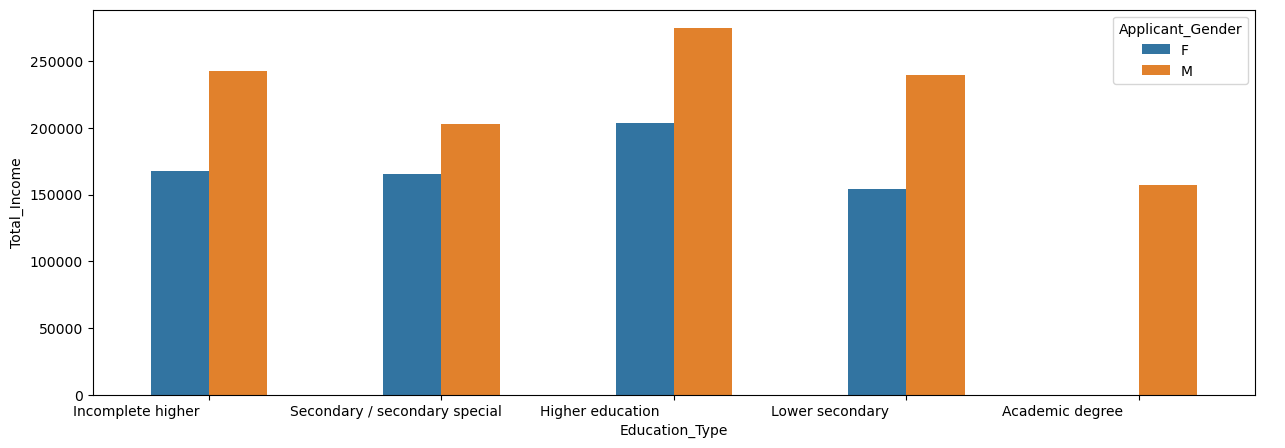

In [13]:
plt.figure(figsize = (15,5))
sns.barplot(x = df['Education_Type'], y = df['Total_Income'], hue = df['Applicant_Gender'], ci = None, width = 0.5)

C:\Users\Raj\AppData\Local\Temp\ipykernel_1672\3293785359.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df['Family_Status'], y = df['Total_Income'], hue = df['Applicant_Gender'], ci = None, width = 0.4)


<Axes: xlabel='Family_Status', ylabel='Total_Income'>

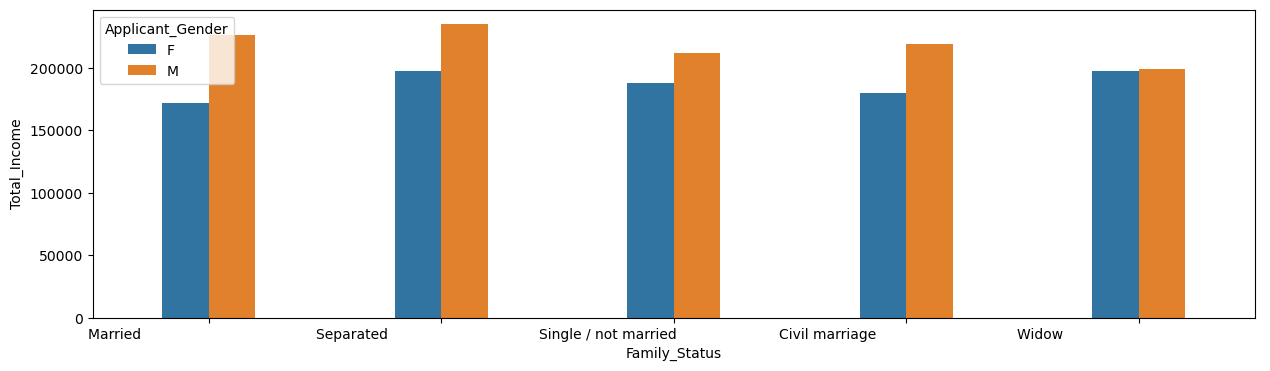

In [14]:
plt.figure(figsize = (15,4))
sns.barplot(x = df['Family_Status'], y = df['Total_Income'], hue = df['Applicant_Gender'], ci = None, width = 0.4)

<Axes: xlabel='Total_Debt', ylabel='Total_Income'>

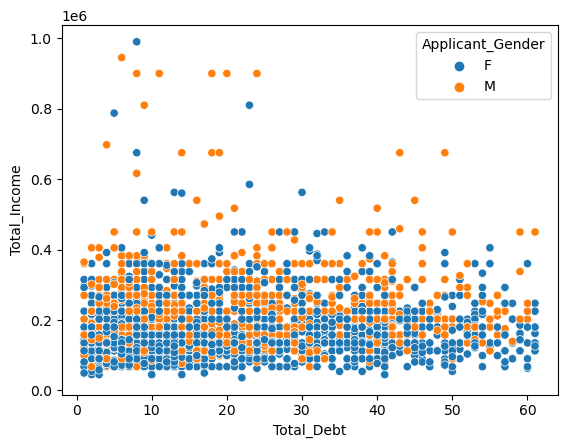

In [15]:
sns.scatterplot(y = df['Total_Income'], x = df['Total_Debt'], hue = df['Applicant_Gender'])

<Axes: xlabel='Total_Debt', ylabel='Count'>

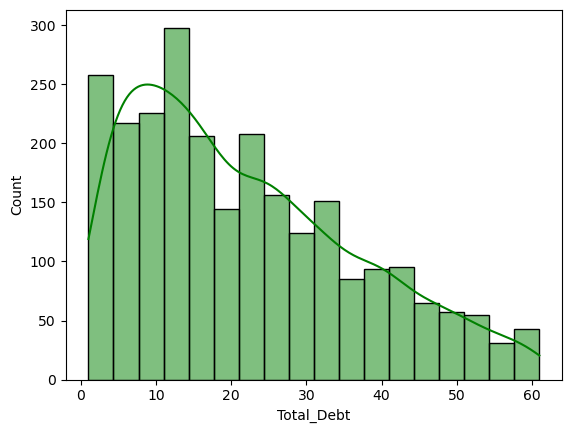

In [16]:
sns.histplot(df['Total_Debt'], kde = True, color = 'g')

C:\Users\Raj\AppData\Local\Temp\ipykernel_1672\1421502850.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df['Family_Status'], y = df['Total_Debt'], hue = df['Applicant_Gender'], ci = None, width = 0.4)


<Axes: xlabel='Family_Status', ylabel='Total_Debt'>

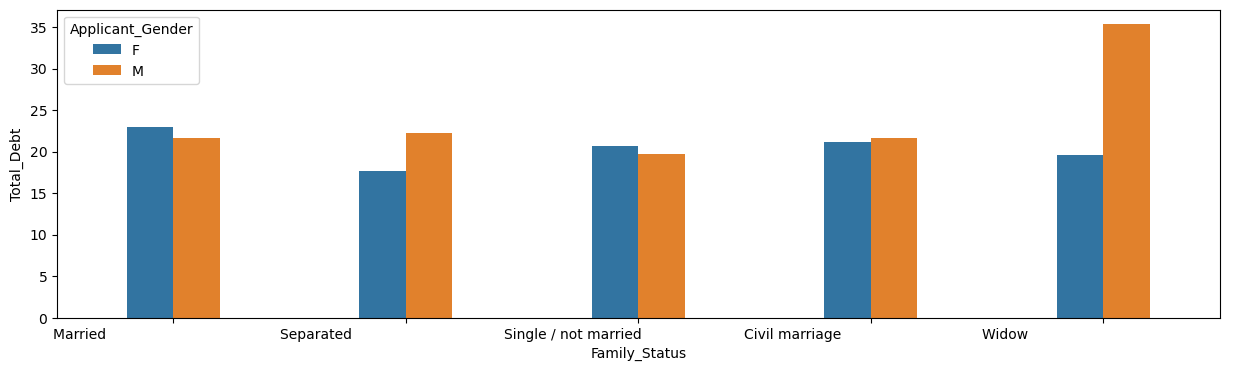

In [17]:
plt.figure(figsize = (15,4))
sns.barplot(x = df['Family_Status'], y = df['Total_Debt'], hue = df['Applicant_Gender'], ci = None, width = 0.4)

C:\Users\Raj\AppData\Local\Temp\ipykernel_1672\786842621.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df['Housing_Type'], y = df['Total_Debt'], hue = df['Owned_Realty'], ci = None, width = 0.5)


<Axes: xlabel='Housing_Type', ylabel='Total_Debt'>

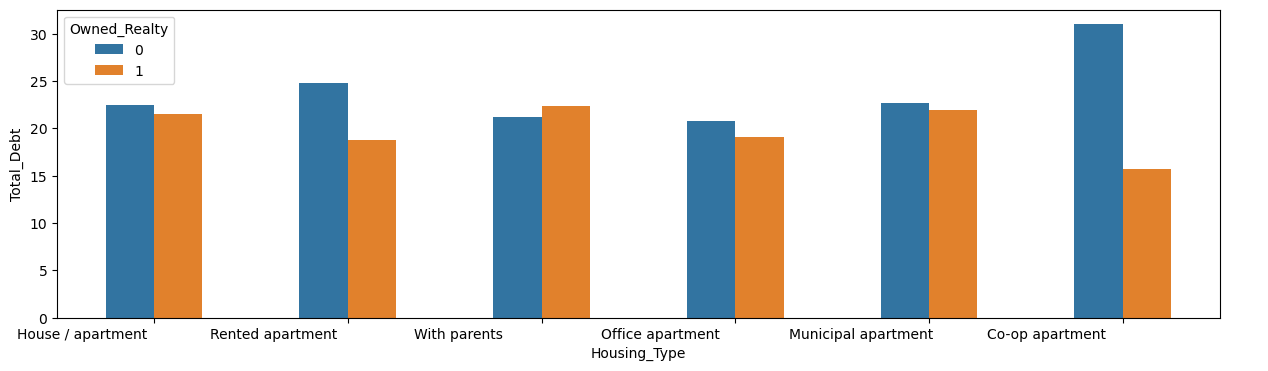

In [18]:
plt.figure(figsize = (15,4))
sns.barplot(x = df['Housing_Type'], y = df['Total_Debt'], hue = df['Owned_Realty'], ci = None, width = 0.5)

<Axes: xlabel='Total_Debt', ylabel='Years_of_Working'>

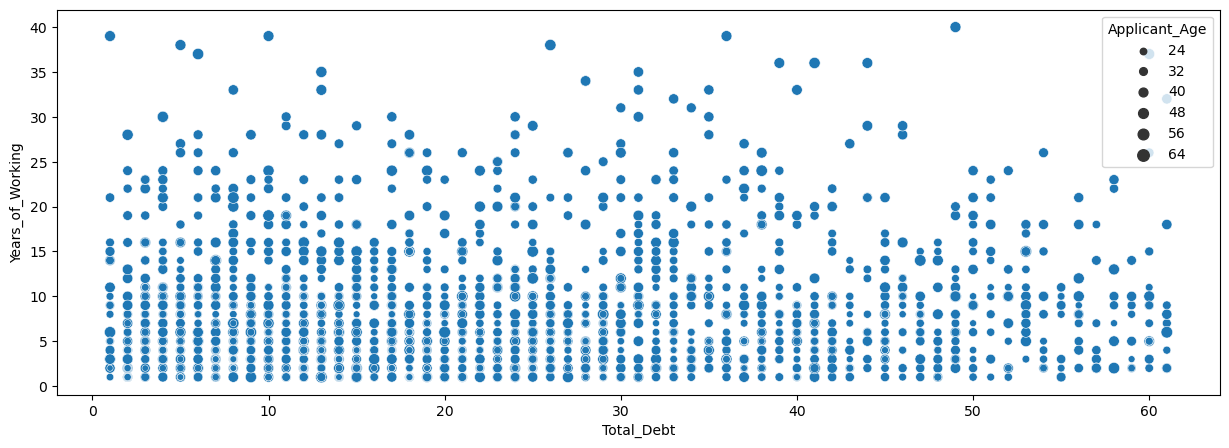

In [19]:
plt.figure(figsize = (15,5))
sns.scatterplot(y = df['Years_of_Working'], x = df['Total_Debt'], size = df['Applicant_Age'])

C:\Users\Raj\AppData\Local\Temp\ipykernel_1672\3229076399.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df['Total_Debt'], y = df['Total_Family_Members'], ci = None, orient = 'h')


<Axes: xlabel='Total_Debt', ylabel='Total_Family_Members'>

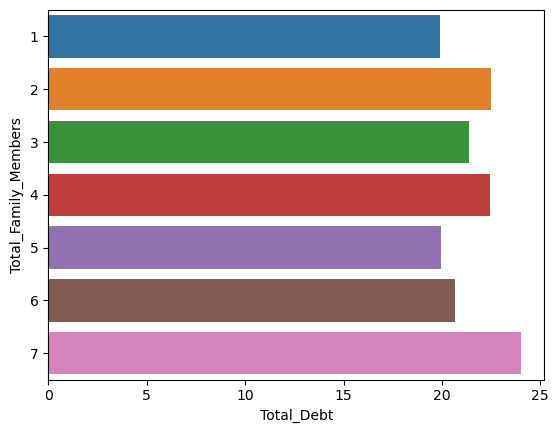

In [20]:
sns.barplot(x = df['Total_Debt'], y = df['Total_Family_Members'], ci = None, orient = 'h')

<Axes: xlabel='Job_Title', ylabel='Total_Debt'>

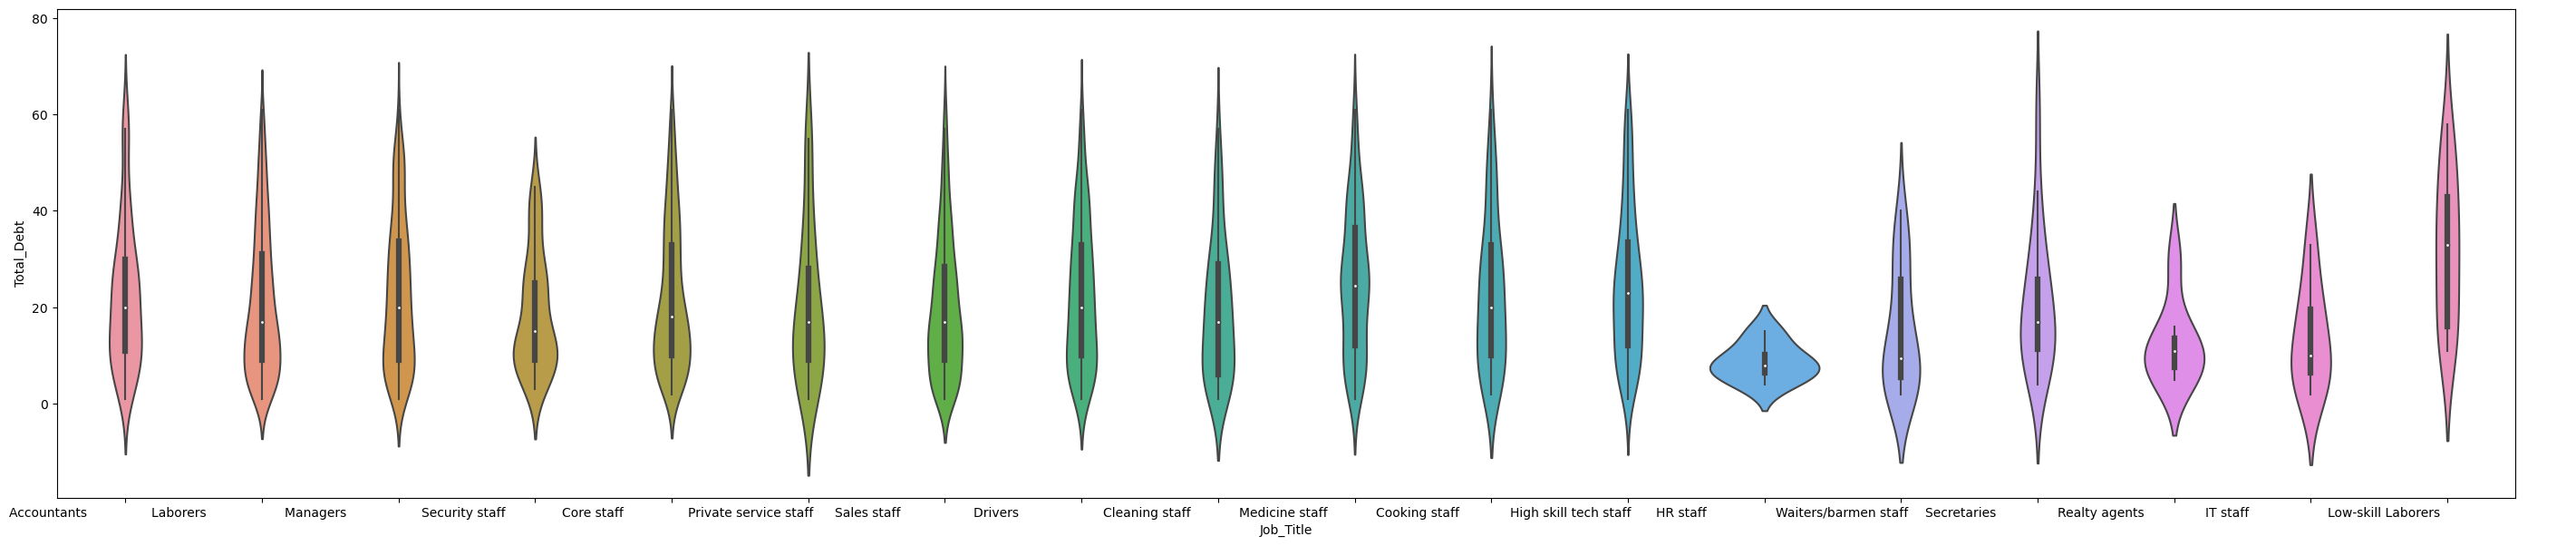

In [21]:
plt.figure(figsize = (35,7))
sns.violinplot(x = df['Job_Title'], y = df['Total_Debt'])

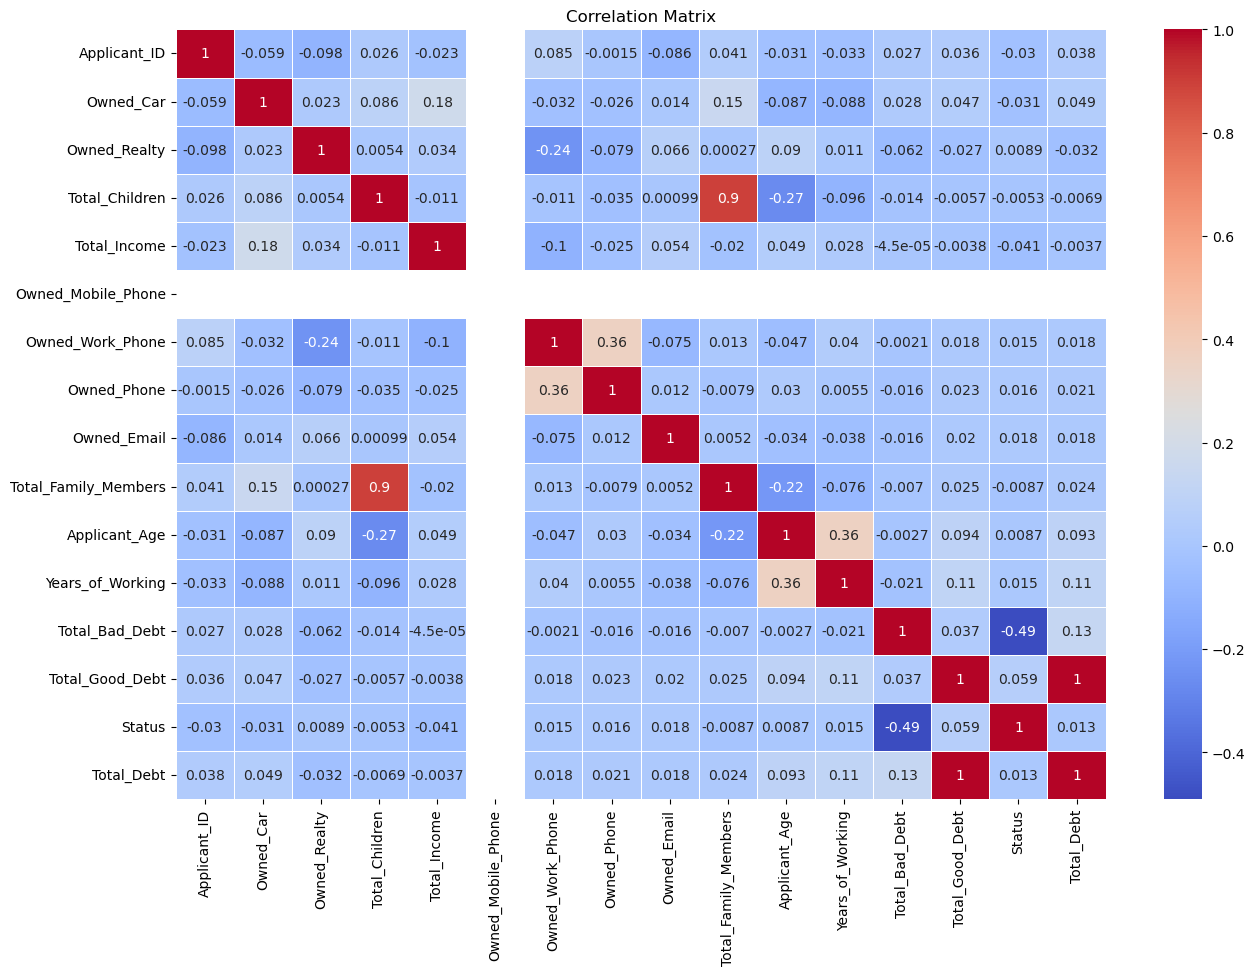

In [22]:
df_numeric = df.select_dtypes(include = ['int64', 'float64'])
corr = df_numeric.corr()

plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

# Encode categorical variables and scale all the numerical features

In [23]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(['Applicant_ID', 'Status'], axis=1))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['Status'], test_size=0.2, random_state=42)

In [24]:
# Add a new feature Debt_To_Income_Ratio
df['Debt_To_Income_Ratio'] = df['Total_Bad_Debt'] / df['Total_Good_Debt']

# Split dataset into train and test part

In [25]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

In [26]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')


Accuracy: 0.9980
Precision: 0.9980
Recall: 1.0000
ROC-AUC: 1.0000


# Compare actual and predicted result

In [27]:
# Save predictions and evaluation metrics to a CSV file
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

results_df.to_csv('model_predictions.csv', index=False)

# export the predicted data

In [28]:
# Make predictions on the entire dataset
df['Predicted_Status'] = rf_classifier.predict(scaled_features)

# Export predictions for the whole dataset
df.to_csv('predictions_for_whole_dataset.csv', index=False)